In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy

# Leapfrog method

## Example

Given a system of differential equations
$$
    p'(t) = \frac{dp}{dt} = q(t)
$$
$$
    q'(t) = \frac{dq}{dt} = -p(t)
$$
with some initial conditions $p(0) = p_0, q(0) = q_0$.

### Exact result

We have
$$
    q = \frac{dp}{dt} = \frac{dp}{dq} \frac{dq}{dt} = \frac{dp}{dq}(-p) \Rightarrow -p dp = q dq 
$$

With constant $r$, solving the above differential equation leads to
$$
    -p^2 + r^2 = q^2 \Rightarrow p^2 + q^2 = r^2 \Rightarrow q = \sqrt{r^2 - p^2}
$$

Plug that into the second differential equation, we get
$$
    \frac{dp}{dt} = q = \sqrt{r^2 - p^2}
$$
Let $p = r \sin{u} \Rightarrow dp = r \cos{u} du$
$$
    r \cos{u} \frac{du}{dt} = r \cos{u} \Rightarrow du = dt
$$

With constant $a$, this gives
$$
u = t + a \Rightarrow p(t) = r \sin (t + a)
$$
And finally,
$$
    q(t) = r \cos (t + a)
$$

With the initial conditions, we can infer that
$$
    r = \sqrt{p_0^2 + q_0^2}
$$
$$
    a = \arctan \frac{p_0}{q_0}
$$

In [2]:
def exact_result(p0, q0, tmin, tmax, step=1000):
    r = np.sqrt(p0 * p0 + q0 * q0)
    a = np.arctan(p0 / q0)

    t = np.linspace(tmin, tmax, step)
    p = r * np.sin(t + a)
    q = r * np.cos(t + a)

    return p, q

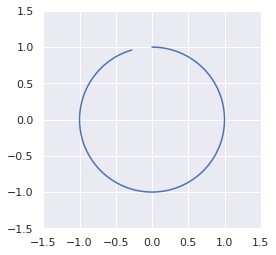

In [3]:
p, q = exact_result(0, 1, 0, 6)

plt.plot(p, q)
plt.axis('scaled')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

### Euler's Method

$$
    p(t+\epsilon) = p(t) + \epsilon p'(t) = p(t) + \epsilon q(t)
$$
$$
    q(t+\epsilon) = q(t) + \epsilon q'(t) = q(t) - \epsilon p(t)
$$

In [4]:
def euler_method(p0, q0, epsilon, nsteps):
    p = np.zeros(nsteps + 1)
    q = np.zeros(nsteps + 1)

    p[0], q[0] = p0, q0
    for i in range(1, nsteps+1):
        p[i] = p[i-1] + epsilon * q[i-1]
        q[i] = q[i-1] - epsilon * p[i-1]
    return p, q

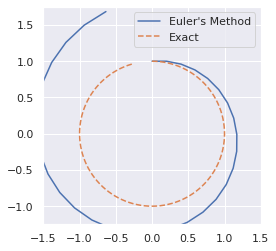

In [5]:
p, q = euler_method(0.0, 1.0, 0.2, 30)
plt.plot(p, q, label="Euler's Method")

p, q = exact_result(0.0, 1.0, 0, 6)
plt.plot(p, q, linestyle='dashed', label="Exact")

plt.axis('scaled')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.25, 1.75)
plt.legend()
plt.show()

### Modified Euler's Method

$$
    p(t+\epsilon) = p(t) + \epsilon q(t)
$$
$$
    q(t+\epsilon) = q(t) - \epsilon p(t + \epsilon)
$$

In [6]:
def modified_euler_method(p0, q0, epsilon, nsteps):
    p = np.zeros(nsteps + 1)
    q = np.zeros(nsteps + 1)

    p[0], q[0] = p0, q0
    for i in range(1, nsteps+1):
        p[i] = p[i-1] + epsilon * q[i-1]
        q[i] = q[i-1] - epsilon * p[i]
    return p, q

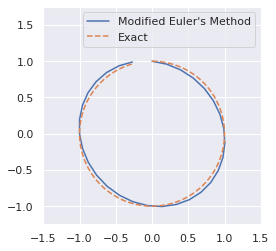

In [7]:
p, q = modified_euler_method(0.0, 1.0, 0.2, 30)
plt.plot(p, q, label="Modified Euler's Method")

p, q = exact_result(0.0, 1.0, 0, 6)
plt.plot(p, q, linestyle='dashed', label="Exact")

plt.axis('scaled')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.25, 1.75)
plt.legend()
plt.show()

### Leapfrog Method

$$
    q \left( t + \frac{\epsilon}{2} \right)
    = q(t) - \frac{\epsilon}{2} p(t)
$$
$$
    p(t + \epsilon) 
    = p(t) + \epsilon q \left( t + \frac{\epsilon}{2} \right)
$$
$$
    q (t + \epsilon)
    = q(t) - \frac{\epsilon}{2} p(t + \epsilon)
$$

In [8]:
def leapfrog(p0, q0, epsilon, nsteps):
    p = np.zeros(nsteps + 1)
    q = np.zeros(nsteps + 1)

    p[0], q[0] = p0, q0
    qhalf = q0 - epsilon / 2 * p0
    for i in range(1, nsteps+1):
        p[i] = p[i-1] + epsilon * qhalf
        q[i] = qhalf - epsilon / 2 * p[i]
        qhalf = q[i] - epsilon / 2 * p[i]
    return p, q

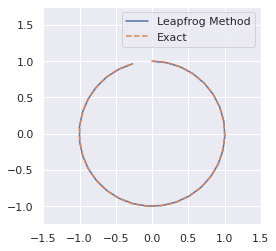

In [9]:
p, q = leapfrog(0.0, 1.0, 0.2, 30)
plt.plot(p, q, label="Leapfrog Method")

p, q = exact_result(0.0, 1.0, 0, 6)
plt.plot(p, q, linestyle='dashed', label="Exact")

plt.axis('scaled')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.25, 1.75)
plt.legend()
plt.show()